## Weather Prediction Model
#### Mini Project

###### by Matthew Parker



In this project, data of past weather for three cities - Bristol, Reykjavik, and Los Angeles - is provided. This is used to predict upcoming weather in all three of these cities, using Monte Carlo Markov Chains. 

In [1]:
# imports used throughout this project

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helpers import merge_specific_data, get_unique_conds, calc_discrete_probability_array, plot_probabilities, assign_colours
from helpers import multiple_data_predictions, plot_predictions, compare_variations, calc_cont_prob_arrays
from matplotlib import colormaps


In [2]:
# list of cities for which data is provided
# Number of cities can be changed and the whole code will still run (as long there is csv data for any cities added).

cities = ['bristol', 'reykjavik', 'la']
num_cities = len(cities)

In [3]:
# Make dictionary of the city names and the data provided

all_data = {}

for city in cities:
    all_data[city] = pd.read_csv(f'datasets/{city}_weather_winter.csv')

# A sample of one of the dataframes to show how the data is provided. 
# Only the first 3 rows of 2760 are shown.
all_data['bristol'].head(3)

,time,city,icon,summary,precipIntensity,precipAccumulation,precipType,temperature,apparentTemperature,dewPoint,pressure,windSpeed,windGust,windBearing,cloudCover,snowAccumulation
0,2022-11-01 00:00:00+00:00,bristol,rain,Rain,0.69,0.0686,rain,12.64,14.58,11.37,995.70,5.49,15.59,215.48,1.0,0.0
1,2022-11-01 01:00:00+00:00,bristol,rain,Rain,1.66,0.1655,rain,12.34,14.26,11.34,996.71,7.71,22.16,247.17,1.0,0.0
2,2022-11-01 02:00:00+00:00,bristol,rain,Rain,0.36,0.0365,rain,12.03,13.50,10.39,998.93,11.49,20.51,247.84,1.0,0.0


### Data Preparation

In [4]:
# Merge the summary columns for each city into one dataset

summary_merged =  merge_specific_data(all_data, 'summary')
summary_merged.head(3)

,bristol,reykjavik,la
0,Rain,Cloudy,Cloudy
1,Rain,Cloudy,Cloudy
2,Rain,Cloudy,Partly Cloudy


In [5]:
# Get all the unique conditions that occur across all the datasets for the summary data
unsorted_unique_conditions = get_unique_conds(summary_merged)

(unsorted_unique_conditions)

array(['Rain', 'Cloudy', 'Partly Cloudy', 'Clear', 'Snow'], dtype=object)

In [6]:
# Sort the unique conditions into an order that makes more sense (increasing extremity of weather)
unique_weather_conditions = []

display_order= [3,2,1,0,4]
for i in display_order:
    unique_weather_conditions.append(unsorted_unique_conditions[i])

print(unique_weather_conditions)

['Clear', 'Partly Cloudy', 'Cloudy', 'Rain', 'Snow']


In [7]:
# Calculate probability array of the next weather conditions for bristol as an example. 
# The values give the probability that the column condition will occur, given that the last condition was the row condition

probability_array, probability_df = calc_discrete_probability_array(summary_merged['bristol'], unique_weather_conditions)
probability_df

,Clear,Partly Cloudy,Cloudy,Rain,Snow
Clear,0.812006,0.139021,0.041074,0.007899,0.000000
Partly Cloudy,0.201258,0.540881,0.232704,0.025157,0.000000
Cloudy,0.016442,0.086697,0.853513,0.042601,0.000747
Rain,0.003367,0.053872,0.195286,0.747475,0.000000
Snow,0.000000,0.000000,0.071429,0.000000,0.928571


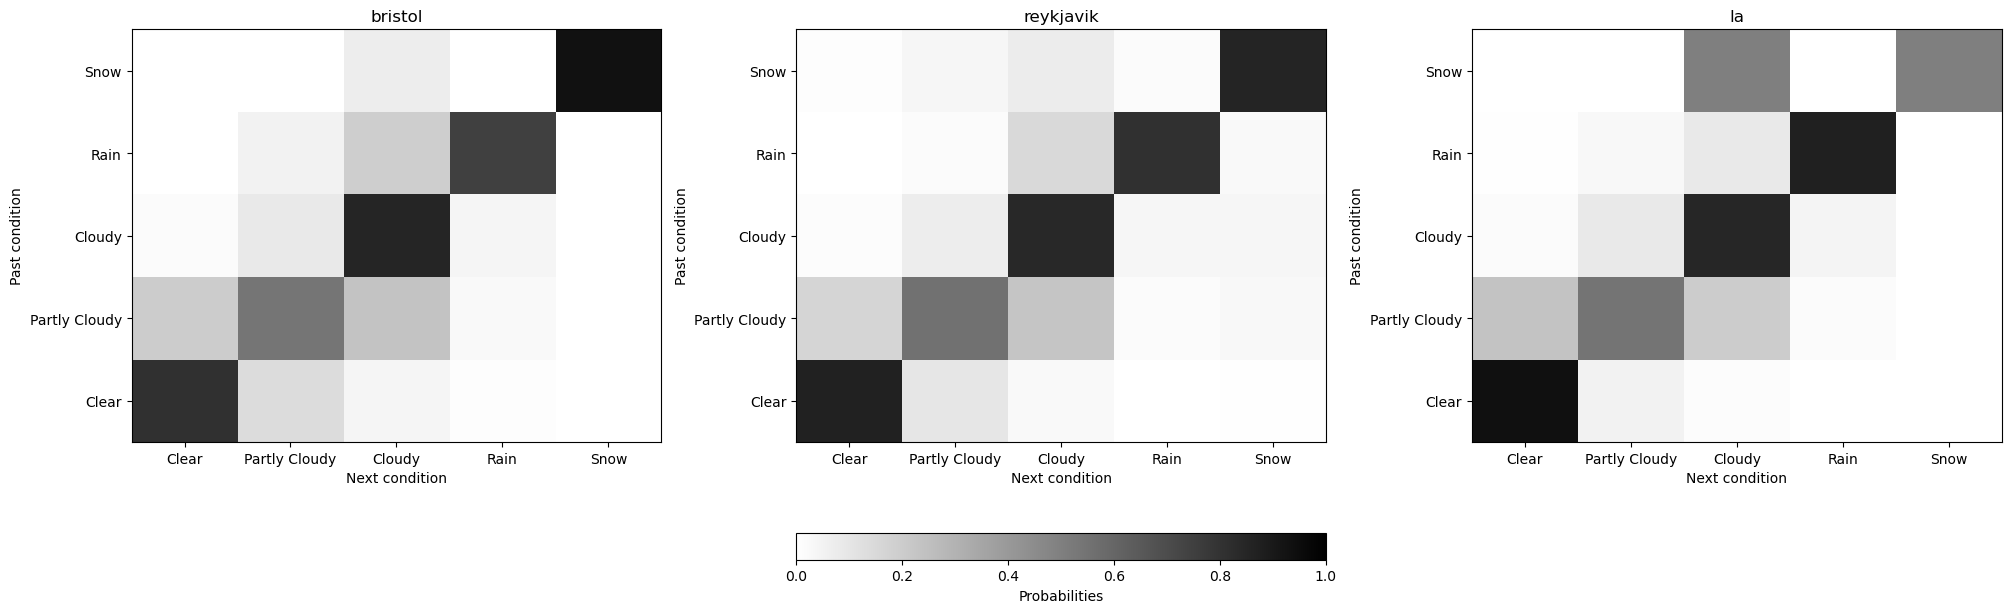

In [8]:
# Create a dictionary containing the probability arrays for each city

# Empty dictionary
summary_prob_arrays = {}

# Constrained layout used to make figure look better with the inclusion of a colour bar.
fig, axes = plt.subplots(ncols=num_cities, figsize=(20,6), layout='constrained')

# Used to determine which figure the colourbar should be plotted underneath
central_plot = round( (num_cities - 1) / 2 )

for i, city in enumerate(cities):
    
    # Calculate probability array for each city
    probability_array = calc_discrete_probability_array(summary_merged[f'{city}'], unique_weather_conditions)[0]
    
    # Add probability array to dictionary
    summary_prob_arrays[city] = probability_array
    
    ax = axes[i]
    
    # Add colourbar to central plot 
    colourbar_bool=False
    if i == central_plot:
        colourbar_bool = True

    plot_probabilities(city_prob_array=probability_array, ax=ax, 
                       unique_conds=unique_weather_conditions, title=city, colourbar=colourbar_bool)
    

### Plot of single prediction

In [9]:
# Assign colours to each unique weather condition

# Colours chosen to maximise contrast to make it easier to see the different conditions
colours_list = ['lawngreen', 'orangered', 'dimgrey', 'magenta', 'deepskyblue']
summary_colours_dict = assign_colours(unique_weather_conditions, colours_list)
summary_colours_dict



{'Clear': 'lawngreen',
 'Partly Cloudy': 'orangered',
 'Cloudy': 'dimgrey',
 'Rain': 'magenta',
 'Snow': 'deepskyblue'}

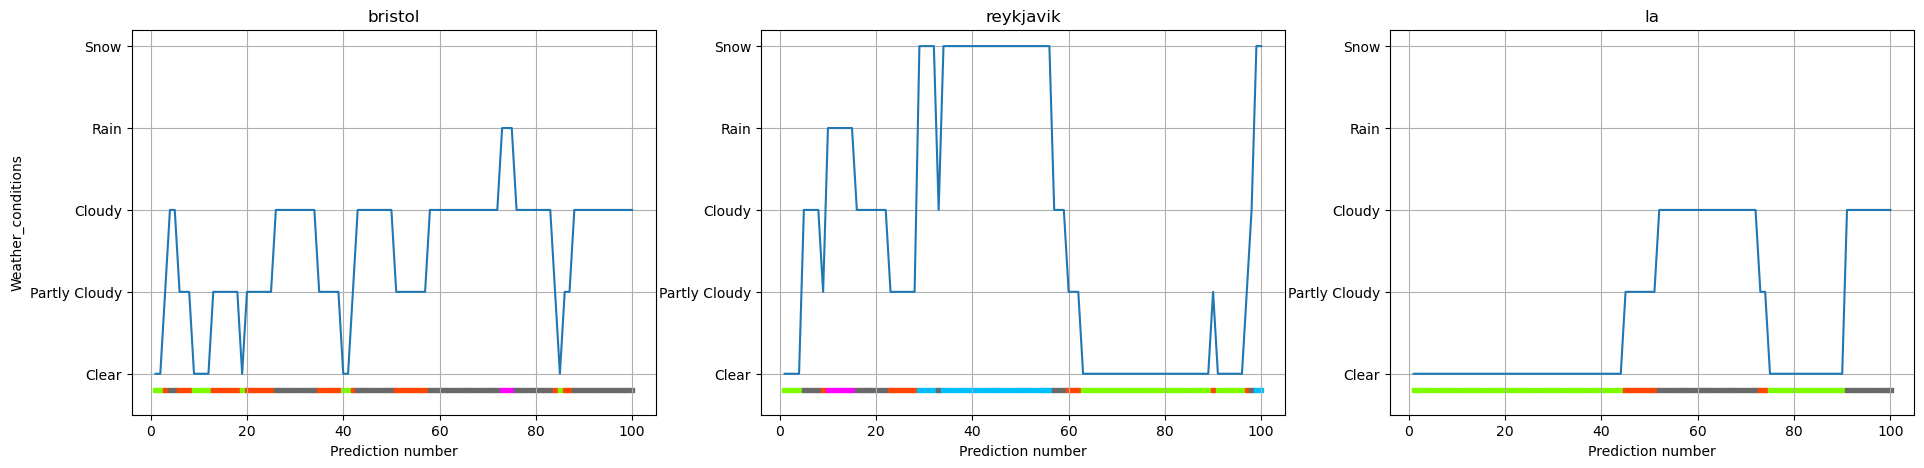

In [10]:
# Plot of a single prediction for each of the three cities

fig, axes = plt.subplots(ncols=num_cities, figsize=(23, 5))

# Single prediction
samples=1
num_predictions=100
initial_selection='Clear'

for i, city in enumerate(cities):

    # probability array of the desired city, obtained from the dictionary created earlier
    prob_array = summary_prob_arrays[f'{city}']
    
    # Obtain the prediction of the weather summary data for this specific city.
    city_summary_prediction = multiple_data_predictions(prob_array=prob_array, samples=samples, num_predictions=num_predictions,
                                                        possible_conditions=unique_weather_conditions, initial_selection=initial_selection)

    # Axis for predictions to be plotted on.
    ax = axes[i]
    
    # PLot y_label only on leftmost figure. Other labels overlaps with over figures. 
    y_label = None
    if i==0:
        y_label = 'Weather_conditions'
    
    # Plot the predictions
    plot_predictions(city_summary_prediction, colours=summary_colours_dict, axis=ax, title=f'{city}', y_label=y_label)

In these plots, it can generally be seen that Bristol has more variable weather, Reykjavik is often the only city to have snow conditions, and LA generally has significantly more clear weather than the other cities. 

However, because the prediction is randomly generated and these plots show only one run, these patterns are not guaranteed to occur. 

### Plot multiple sets of data

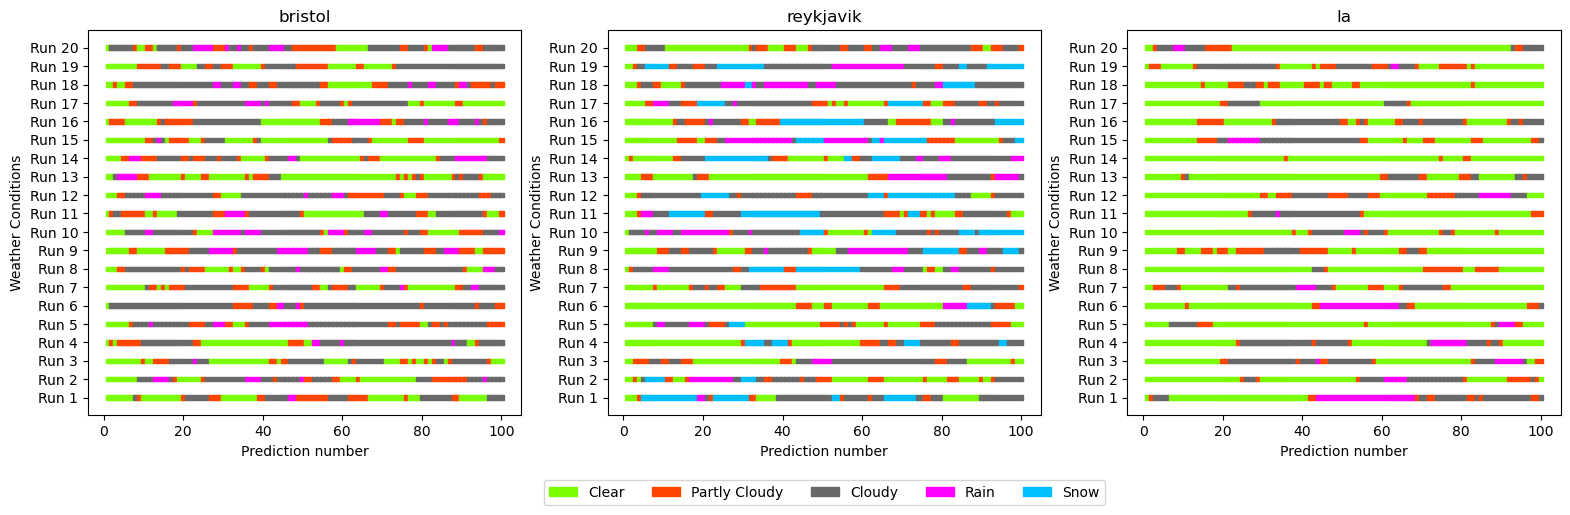

In [ ]:

samples = 20
num_predictions = 100
initial_selection = 'Clear'

# If more than 250 predictions, stack subplots vertically instead of horizontally.
# This ensures the scatter plot points touch which I think makes it way easier to visualise changes in weather compared to if they are distinct points. 
numcols=num_cities
numrows=1
if num_predictions >= 250:
    numcols=1
    numrows=num_cities

# Extend length of subplots if plots stacked vertically
fig, ax = plt.subplots(nrows=numrows, ncols=numcols, figsize=(19, 5*numrows))


# Plot predictions for each city
for i, city in enumerate(cities):
    
    # Probability array for this city
    prob_array = summary_prob_arrays[f'{city}']

    legend_bool=False
    
    # Plot legend in middle if subplots stacked horizontally
    if numrows==1 and i==1:
        legend_bool=True
    # Plot legend at bottom if subplots stacked vertically
    elif numcols==1 and i==2:
        legend_bool=True

    predictions_list = multiple_data_predictions(prob_array=prob_array, samples=samples, num_predictions=num_predictions,
                                                 possible_conditions=unique_weather_conditions, initial_selection=initial_selection)
    
    plot_predictions(predictions_list, colours=summary_colours_dict, axis=ax[i], plot_legend=legend_bool, y_label='Weather Conditions')
    
    # put into above function
    ax[i].set_title(city)


In this case it is clearer to see that LA generally remains more clear, Reyjkavik is more likely to have snowy conditions, and Bristol has high variability.

**Scalability with large iterations**

The model will scale fairly well for large iterations.
However, there are some major problems which may come up with predictions with large iterations.
For example, this model would not work when attempting to predict conditions for summer, as the data is only provided across the winter months.
Also, if the number of iterations were to increase in order to predict multiple weeks rather than a few days, the computational power required would increase signifcantly.  

**More states introduced**

If more states were introduced, the computational power would also increase, as each probability array would be larger and take significantly longer to calculate.

**Other limitations**

The model assumes that weather conditions are only dependent on the last state, which means it does not account for weather patterns that occur over multiple hours. However, with a relatively small dataset like the one provided, there is a potential for overfitting if multiple past conditions were used. 

Furthermore, this model does not use the quantitative data provided. This data could be used to significantly improve the model used, as there are likely relationships between, for example, temperature and the next weather condition. Howver, incorporating this would significantly increase the complexity of the model. 

### Variation checker

Little function to quantify the average number of switches between different conditions for each city. 

In [12]:
compare_variations(cities, summary_prob_arrays, 20, 100, possible_conditions=unique_weather_conditions, initial_selection='Clear')

{'bristol': 21.9, 'reykjavik': 17.8, 'la': 11.8}

Bristol has the most variation, with a higher average number of changes between different weather conditions compared to Reykjavik and LA (which has the least). 
This is expected.

-----------------

### Continuous data predictions

The following section is an initial model that can be used to predict data for any of the continuous numerical data provided. 

These results are generally not tailored, so the colouring and bins may not be as optimised as the solution above.
However, it should work without any errors and produce plausible predictions for the numerical data given. 

With more time this could've been further refined and potentially reduced into a single function. 

##### Temperature

Currently, the data below makes predictions for the temperature data provided in the dataset above. 

However, there are some major limitations:

- First of all, temperature is continuous, whereas the summary data used above was discrete. This adds in the need to split the temperature into bins.
- The bins were calculated to have the same number of data across all the cities in each bin. This means the bin sizes are not the same width. For clarity, this does not mean the bins have the same number of data in them for each city, they have an equal number across all the cities. 
- 10 bins were used - more than the number of unique weather conditions - which means a slightly longer calculation time. However, it all allows more detail in the plots. 
- It is unknown how the temperature is distributed within a bin: I debated calculating a random temperature within a bin, but this would not be based on any fact and decided to stick to just having the temperatures plotted into their designated bins. This produces a much less realistic graph, as the temperatures would have variation within the bins, but the figures show the rough change in temperature over the course of the predictions for each city.  

In [13]:
# Shows column names and which data is numerical

all_data['bristol'].head(3)

,time,city,icon,summary,precipIntensity,precipAccumulation,precipType,temperature,apparentTemperature,dewPoint,pressure,windSpeed,windGust,windBearing,cloudCover,snowAccumulation
0,2022-11-01 00:00:00+00:00,bristol,rain,Rain,0.69,0.0686,rain,12.64,14.58,11.37,995.70,5.49,15.59,215.48,1.0,0.0
1,2022-11-01 01:00:00+00:00,bristol,rain,Rain,1.66,0.1655,rain,12.34,14.26,11.34,996.71,7.71,22.16,247.17,1.0,0.0
2,2022-11-01 02:00:00+00:00,bristol,rain,Rain,0.36,0.0365,rain,12.03,13.50,10.39,998.93,11.49,20.51,247.84,1.0,0.0


**Input the name of the column of interest below.**
This is initially set to temperature but can take other values such as precipAccumulation

In [14]:
# Input the name of the column of interest here. 
# If it does not belong in the column names, a ValueError will occur
column_of_interest = 'temperature'

In [15]:
# Merge data across the three cities into one dataframe
merged =  merge_specific_data(all_data, column_of_interest)

# Get unique conditions across the cities  
# This is used to calculate the bins across the whole temperature distribution across the three cities. 
# Reykjavik and LA do not have the same temperature ranges, so this was used to standardise the temperature range across the cities
# This means the temperatures in the plots below align across each subplot
values_across_cities = get_unique_conds(merged)
print((values_across_cities).shape)

(2675,)


In [16]:
# Get probability arrays, bins, and bin_indices for bristol

cont_probability_array, cont_probability_df, bin_indices, bins = calc_cont_prob_arrays(merged['bristol'], values_across_cities )

# Labels of the dataframe show the upper bounds of that specific bin
cont_probability_df

,-8.497,-4.161,-1.055,1.797,4.511,7.205,9.889,12.643,16.023,25.101
-8.497,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-4.161,0.0,0.904762,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-1.055,0.0,0.008850,0.862832,0.128319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.797,0.0,0.000000,0.114625,0.758893,0.122530,0.003953,0.000000,0.000000,0.000000,0.000000
4.511,0.0,0.000000,0.000000,0.088643,0.789474,0.121884,0.000000,0.000000,0.000000,0.000000
7.205,0.0,0.000000,0.000000,0.000000,0.082734,0.816547,0.100719,0.000000,0.000000,0.000000
9.889,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.846491,0.070175,0.000000,0.000000
12.643,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.091248,0.878957,0.029795,0.000000
16.023,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135593,0.847458,0.016949
25.101,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333


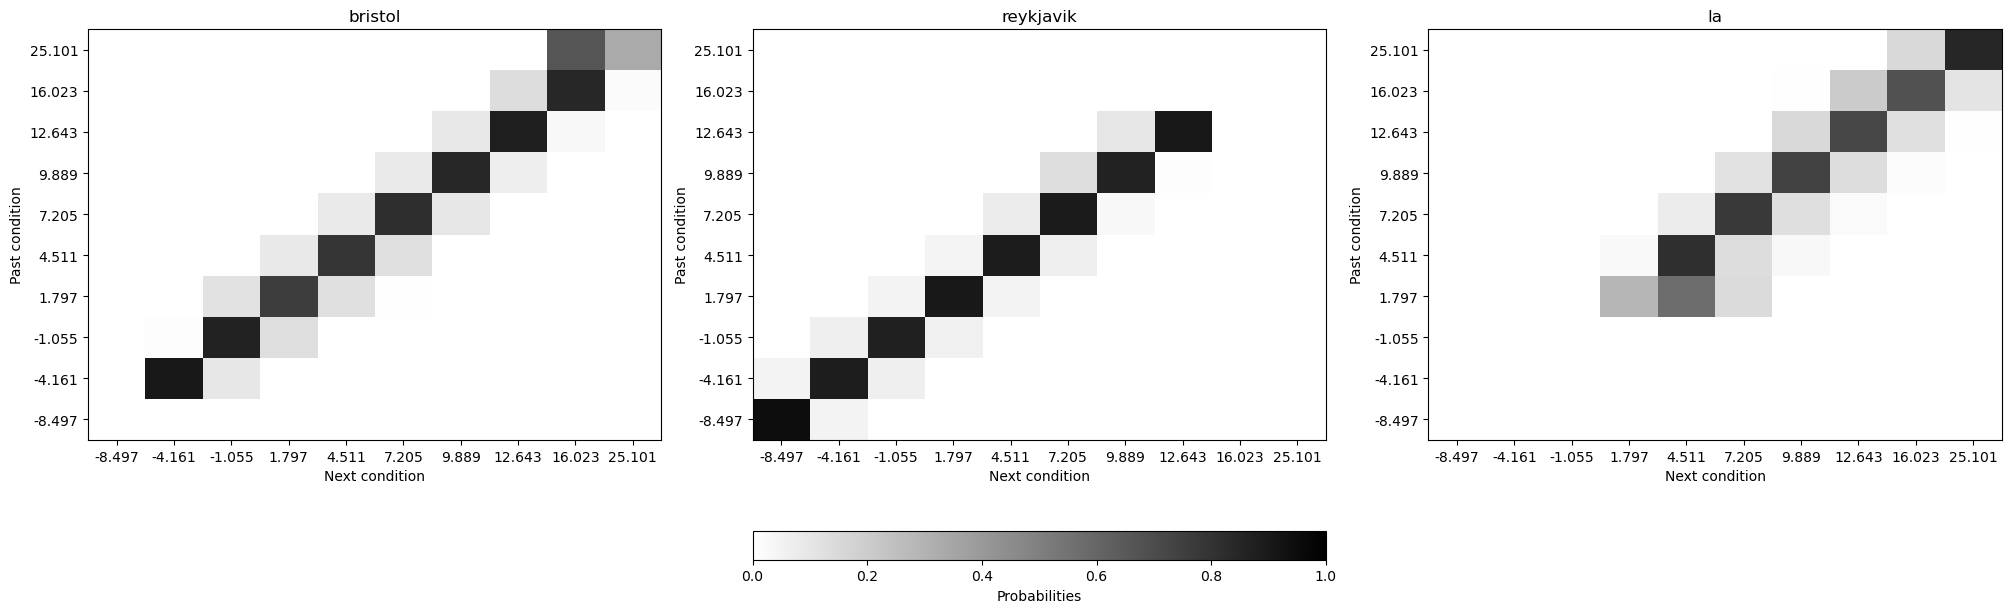

In [17]:
# Create dictionary of temperature probability arrays for each city
# PLot each one.

# Empty dictionary
prob_arrays = {}

fig, axes = plt.subplots(ncols=num_cities, figsize=(20,6), layout='constrained')

# Used to determine which figure the colourbar should be plotted underneath
central_plot = round( (num_cities - 1) / 2 )

for i, city in enumerate(cities):
    
    # Calculate probability array for each city
    # probability_array = calc_discrete_probability_array(summary_merged[f'{city}'], unique_weather_conditions)[0]
    probability_array = calc_cont_prob_arrays(merged[f'{city}'], values_across_cities )[0]
    
    # Add probability array to dictionary
    prob_arrays[city] = probability_array
    
    ax = axes[i]
    
    # Add colourbar to central plot 
    colourbar_bool=False
    if i == central_plot:
        colourbar_bool = True

    plot_probabilities(city_prob_array=probability_array, ax=ax, 
                       unique_conds=bins, title=city, colourbar=colourbar_bool)
    

In [18]:
# Colour map from blue to white to red - classic colour distinctions for temperatures
# This makes less sense if the colomn_of_interest is not temperature, but still works
cmap = colormaps['bwr']

# Get colours along regular intervals of colourmap
colours = cmap(np.linspace(0, 1, len(bins)))
colours_dict = assign_colours(bins, colours)

Initial selection of continuous bin: 7.205


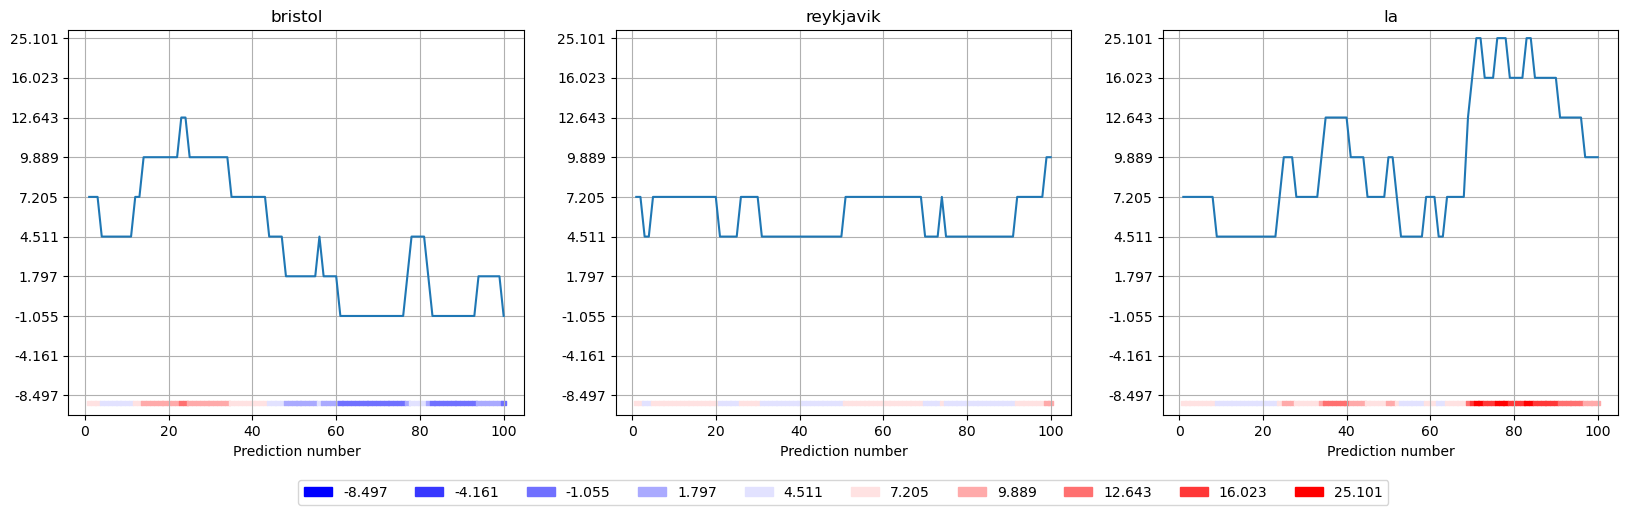

In [19]:
# Plot of single temperature prediction for  each city. 
samples=1

fig, axes = plt.subplots(ncols=num_cities, figsize=(20, 5))

# Arbitrary initial selection
initial_selection = bins[-5]
print(f'Initial selection of continuous bin: {initial_selection}')

for i, city in enumerate(cities):
    ax = axes[i]
    
    prob_array = prob_arrays[f'{city}']
    
    legend_bool=False
    
    # Plot legend in middle if subplots stacked horizontally
    if numrows==1 and i==1:
        legend_bool=True
    # Plot legend at bottom if subplots stacked vertically
    elif numcols==1 and i==2:
        legend_bool=True
    # city_summary_prediction = data_prediction(prob_array, num_predictions=100, possible_conditions=unique_weather_conditions, initial_selection='Clear')
    
    city_prediction = multiple_data_predictions(prob_array=prob_array, samples=samples, num_predictions=100, 
                                                        possible_conditions=bins , initial_selection=initial_selection)
    
    y_label=None
    if i == 0: 
        y_label='bounds'
        
    plot_predictions(city_prediction, colours=colours_dict, axis=ax, plot_legend=legend_bool, title=f'{city}')

Reykjavik generally goes to lower temperatures, whereas La goes to higher temperatures. Bristol is more random.

Once again, these patterns may not be seen in these plots directly.

Initial selection of continuous bins: 7.205


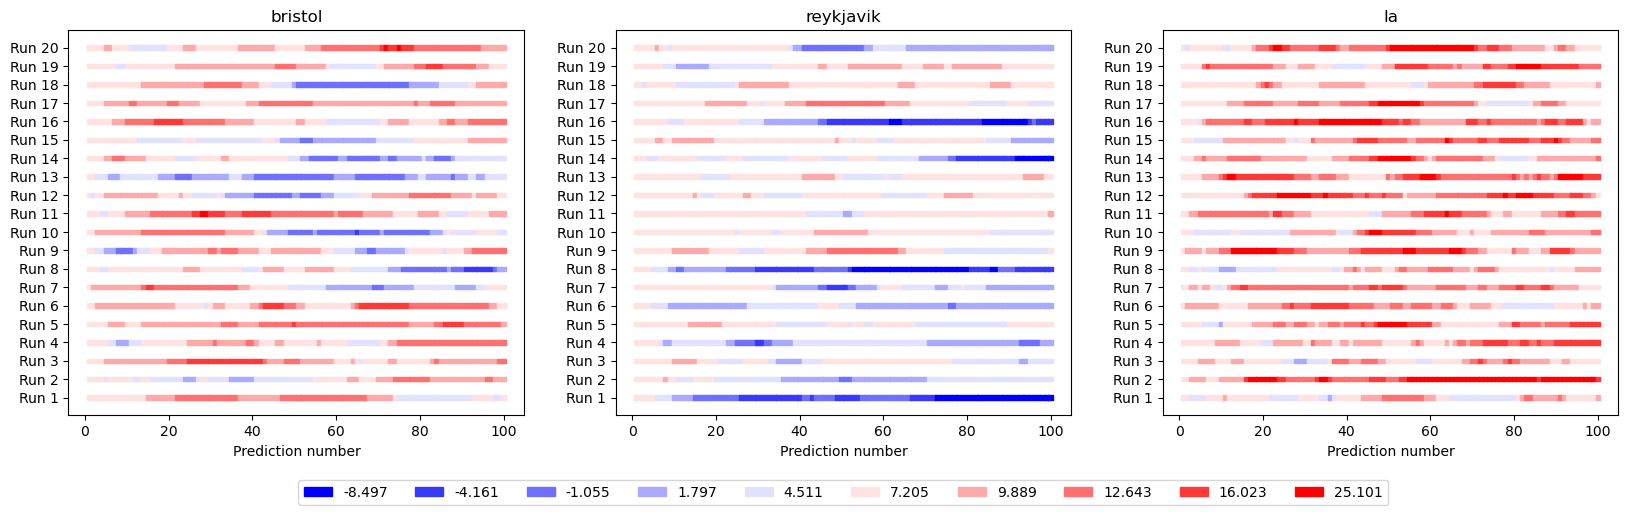

In [20]:
# Plot of single temperature prediction for  each city. 

samples=20

fig, axes = plt.subplots(ncols=num_cities, figsize=(20, 5))

# Arbitrary initial selection
initial_selection = bins[-5]
print(f'Initial selection of continuous bins: {initial_selection}')

for i, city in enumerate(cities):
    ax = axes[i]
    
    prob_array = prob_arrays[f'{city}']
    
    legend_bool=False
    
    # Plot legend in middle if subplots stacked horizontally
    if numrows==1 and i==1:
        legend_bool=True
    # Plot legend at bottom if subplots stacked vertically
    elif numcols==1 and i==2:
        legend_bool=True
    # city_summary_prediction = data_prediction(prob_array, num_predictions=100, possible_conditions=unique_weather_conditions, initial_selection='Clear')
    
    city_prediction = multiple_data_predictions(prob_array=prob_array, samples=samples, num_predictions=100, 
                                                        possible_conditions=bins , initial_selection=initial_selection)
    
    y_label=None
    if i == 0: 
        y_label='bounds'
        
    plot_predictions(city_prediction, colours=colours_dict, axis=ax, plot_legend=legend_bool, title=f'{city}')

The general patterns mentioned above can be spotted more easily in this plot. LA generally has much more (dark) red, with low amounts of blue. Reykjavik on the other hand has large expanses of dark blue, signifying the expected colder temperatures. 
